In [2]:
# import libraries

import tweepy
from textblob import TextBlob
import re
import sys
import csv
import botometer
from tweepy import OAuthHandler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Removed acess keys and tokens for the sake of security

access_token = ''
access_token_secret = ''
consumer_key = ''
consumer_secret = ''

In [4]:
# authorize access to TweePy

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
# Fetch tweets

tweets = []
sentiments =[]
count = 1
query = "#hydroxychloroquine OR #remdesivir OR #Remdesivir OR hydroxychloroquine OR remdesivir OR #GileadSciences OR GileadSciences OR #drug OR drug OR #antiviral OR antiviral OR #Antibiotic OR antibiotic"
for tweet in tweepy.Cursor(api.search,q=query,count=450).items(5):
    print(count)
    count+=1
    
    try:
        data = [tweet.created_at,tweet.id,tweet.text,tweet.source,tweet.retweet_count,tweet.user._json['screen_name'],tweet.user._json['created_at'],tweet.user._json['location'],tweet.coordinates,tweet.entities['urls']]
        data = tuple(data)
        tweets.append(data)
        
    except tweepy.TweepError as e:
        print(e.reason)
        continue
    
    try:
        sentiment_data = [tweet.created_at,tweet.text]
        sentiment_data = tuple(sentiment_data)
        textWords=sentiment_data[1].split()
        #clean tweets
        cleanedTweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(RT)", " ", sentiment_data[1]).split())
        analysis= TextBlob(cleanedTweet)
        polarity = 'Positive'
        if(analysis.sentiment.polarity < 0):
            polarity = 'Negative'
        if(0<=analysis.sentiment.polarity <=0.2):
            polarity = 'Neutral'
        #print (polarity)
        dic={}
        dic['Sentiment']=polarity
        dic['Tweet']=cleanedTweet
        dic['Polarity'] = analysis.sentiment.polarity
        dic['Created_at'] = sentiment_data[0]
        sentiments.append(dic)
        
    except tweepy.TweepError as e:
        print(e.reason)
        continue
    
    except StopIteration:
        break
        
df_analysis = pd.DataFrame(tweets, columns = ['created_at','tweet_id','tweet_text','tweet_source','retweet_count','screen_name','account_creation_date','location','coordinates','urls'])
df_analysis.to_csv('Filepath')

df_sentiment=pd.DataFrame(sentiments)
df_sentiment.to_csv('Filepath')

1
2
3
4
5


In [9]:
import glob
import re
import pandas as pd

In [7]:
all_filenames = [i for i in glob.glob('*.csv')]
print(all_filenames)

['Antiviral_tweet.csv', 'Disinfectant_tweet.csv']


In [8]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "train_dataset.csv", index=False, encoding='utf-8')

In [3]:
df1 = pd.read_csv("sentiment_analysis_antiviral.csv")
df1.head()

,Sentiment,Tweet,Polarity,Created_at
0,Neutral,These niggas be scammers amp drug dealers with...,0.000000,5/26/2020 1:21
1,Neutral,Dear Mr President China has already discovered...,0.000000,5/26/2020 1:21
2,Negative,Whippits A NASTY DRUG Do Not get into that shi...,-0.533333,5/26/2020 1:21
3,Neutral,Amy Klobuchar admitted that Hydroxychloroquine...,0.000000,5/26/2020 1:21
4,Neutral,Amy Klobuchar admitted that Hydroxychloroquine...,0.000000,5/26/2020 1:21


In [11]:
df1['tweet_id'] = df1['tweet_id'].str[2:]
df1
df1.to_csv('test.csv')

In [7]:
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(df1['tweet_text'].apply(hashtag_pattern.findall))
hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch not in hashtag_dict.keys():
            hashtag_dict[singlematch] = 1
        else:
            hashtag_dict[singlematch] = hashtag_dict[singlematch]+1
            

In [8]:
hashtag_ordered_list =sorted(hashtag_dict.items(), key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]
#Separating the hashtags and their values into two different lists
hashtag_ordered_values = []
hashtag_ordered_keys = []
#Pick the 20 most used hashtags to plot
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])

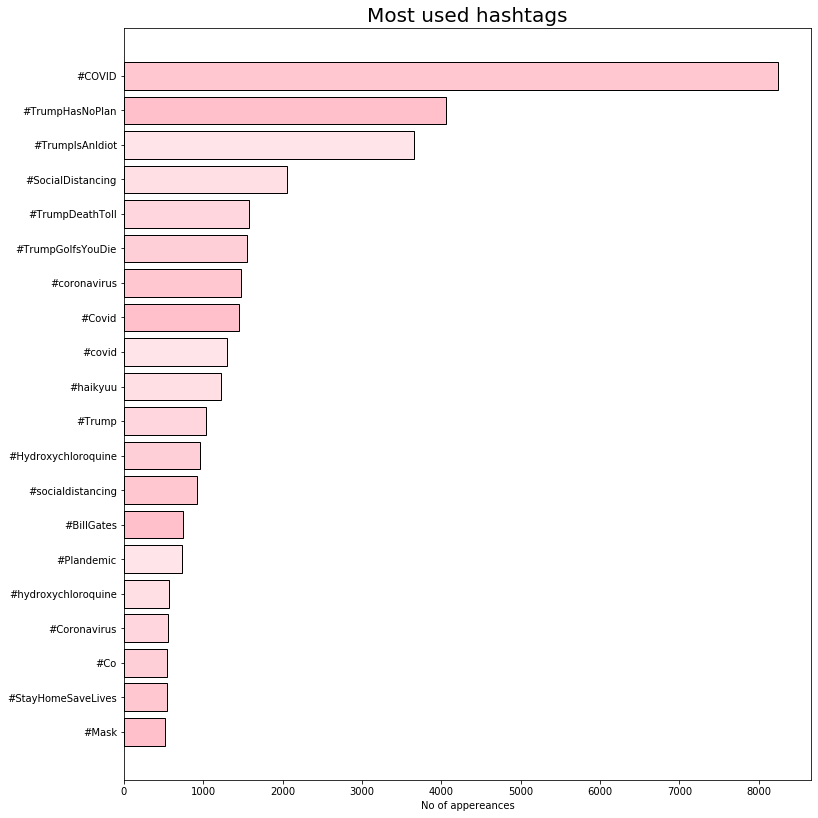

In [9]:
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = sns.light_palette("pink", reverse=True), edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("No of appereances")
ax.set_title("Most used hashtags", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()

In [36]:
mentions = []
mention_pattern = re.compile(r"@[a-zA-Z_]+")
mention_matches = list(df1['tweet_text'].apply(mention_pattern.findall))
mentions_dict = {}
for match in mention_matches:
    for singlematch in match:
        if singlematch not in mentions_dict.keys():
            mentions_dict[singlematch] = 1
        else:
            mentions_dict[singlematch] = mentions_dict[singlematch]+1

In [37]:
#the number of times they have been mentioned
mentions_ordered_list =sorted(mentions_dict.items(), key=lambda x:x[1])
mentions_ordered_list = mentions_ordered_list[::-1]
#Pick the 20 top mentioned users to plot and separate the previous #list into two list: one with the users and one with the values
mentions_ordered_values = []
mentions_ordered_keys = []
for item in mentions_ordered_list[0:20]:
    mentions_ordered_keys.append(item[0])
    mentions_ordered_values.append(item[1])

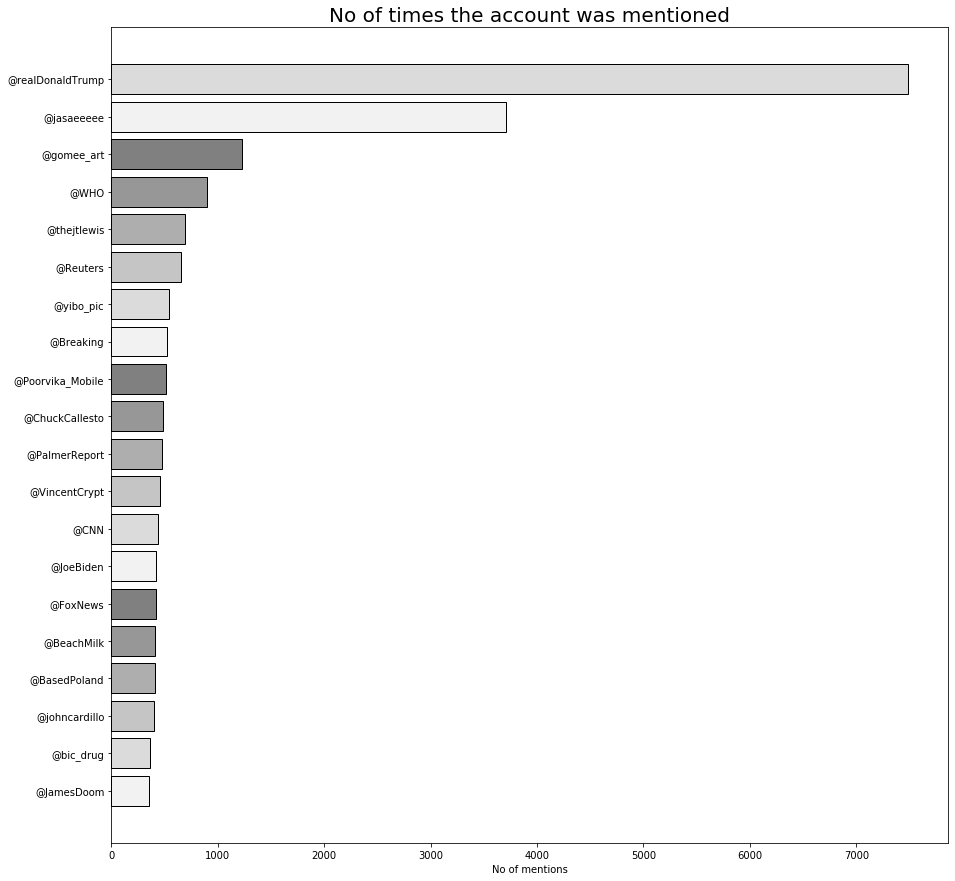

In [12]:
fig, ax = plt.subplots(figsize = (15,15))
y_pos = np.arange(len(mentions_ordered_values))
ax.barh(y_pos ,list(mentions_ordered_values)[::-1], align='center', color = sns.light_palette("grey", reverse=False), edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos )
ax.set_yticklabels(list(mentions_ordered_keys)[::-1])
ax.set_xlabel("No of mentions")
ax.set_title("No of times the account was mentioned", fontsize = 20)

plt.show()

In [5]:
#Going to see who are the users who have tweeted or retweeted the #most and see how
#Likely it is that they are bots
usertweets = df1.groupby('screen_name')
#Taking the top 25 tweeting users
top_users = usertweets.count()['tweet_text'].sort_values(ascending = False)[:20]
top_users_dict = top_users.to_dict()
user_ordered_dict =sorted(top_users_dict.items(), key=lambda x:x[1])
user_ordered_dict = user_ordered_dict[::-1]
#Now, like in the previous hashtags and mention cases, going to make #two lists, one with the username and one with the value
dict_values = []
dict_keys = []
for item in user_ordered_dict[0:20]:
    dict_keys.append(item[0])
    dict_values.append(item[1])

In [6]:
#Plot these results
fig = plt.figure(figsize = (15,15))
index = np.arange(20)
plt.bar(index, dict_values, edgecolor = 'black', linewidth=1, color = sns.light_palette("orange", reverse=True))
plt.xlabel('Most mentioned Users', fontsize = 18)
plt.ylabel('No of Tweets', fontsize=20)
plt.xticks(index,dict_keys, fontsize=15, rotation=90)
plt.title('Number of tweets for the most active users', fontsize = 20)
fig.savefig('image.png')   # save the figure to file
plt.close(fig)
plt.show()

In [7]:
rapidapi_key = ""
#Dictionary with the credentials for the Twitter APIs
twitter_app_auth = {
    'access_token' : "",
    'access_token_secret' : "",
    'consumer_key' : "",
    'consumer_secret' : "",    
}


In [8]:
#Connecting to the botometer API
bom = botometer.Botometer(wait_on_ratelimit = True, rapidapi_key = rapidapi_key, **twitter_app_auth)
#Returns a dictionary with the most active users and the porcentage #of likeliness of them being a Bot using botometer
bot_dict = {}
top_users_list = dict_keys
for user in top_users_list:
    user = '@'+ user
    try:
        result = bom.check_account(user)
        bot_dict[user] = int((result['scores']['english'])*100)
    except tweepy.TweepError:
        bot_dict[user] = 0
        continue
print(bot_dict)

{'@Hotpage_News': 72, '@mitikerang': 20, '@DavidFDodge1': 30, '@TornadoNewsLink': 50, '@rtehrani': 22, '@acnh_is_my_drug': 13, '@two001snake': 34, '@kk131066': 87, '@always92234822': 18, '@fuzionbunny': 12, '@cummingshawk': 52, '@whosusingdiff': 34, '@drug_purple': 38, '@Covidpibot': 0, '@NaattuVarthakal': 86, '@MadrigalMaggie': 20, '@KidKool4U': 34, '@richardursomd': 11, '@janedeger': 48, '@RJP56': 18}


In [12]:
#Plot these results
fig = plt.figure(figsize = (15,15))
index = np.arange(20)
plt.bar(index,bot_dict.values(), edgecolor = 'black', linewidth=1, color = 'Maroon')
plt.xlabel('screen_name', fontsize = 18)
plt.ylabel('% of chance being a bot', fontsize=20)
plt.xticks(index,bot_dict.keys(), fontsize=15, rotation=90)
plt.title('% of a twitter account being a bot', fontsize = 20)
fig.savefig('image1.png')   # save the figure to file
plt.close(fig)
plt.show()